In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\Mohd Shadab\Downloads\Projects\311_Service_Requests_from_2010_to_Present.csv")

D:\Jupyter Notebook\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
data.shape


(300698, 53)

In [5]:
data.columns


Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [6]:
data.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [8]:
data.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

# **Dropping unnecessary and repeated data**

In [9]:
data.drop(['X Coordinate (State Plane)','Agency',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction',
       'Ferry Terminal Name', 'Location','Resolution Action Updated Date',
       'Community Board','Landmark', 'Facility Type',
       'Incident Address', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type','Street Name'],axis=1,inplace=True)


In [10]:
data.head()

,Unique Key,Created Date,Closed Date,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,City,Status,Due Date,Resolution Description,Borough,Latitude,Longitude
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,NEW YORK,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,MANHATTAN,40.865682,-73.923501
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ASTORIA,Closed,01-01-16 7:59,The Police Department responded to the complai...,QUEENS,40.775945,-73.915094
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,BRONX,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,BRONX,40.870325,-73.888525
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,BRONX,Closed,01-01-16 7:57,The Police Department responded to the complai...,BRONX,40.835994,-73.828379
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ELMHURST,Closed,01-01-16 7:56,The Police Department responded and upon arriv...,QUEENS,40.733060,-73.874170


In [11]:
data.shape

(300698, 15)

In [12]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unique Key              300698 non-null  int64  
 1   Created Date            300698 non-null  object 
 2   Closed Date             298534 non-null  object 
 3   Agency Name             300698 non-null  object 
 4   Complaint Type          300698 non-null  object 
 5   Descriptor              294784 non-null  object 
 6   Location Type           300567 non-null  object 
 7   Incident Zip            298083 non-null  float64
 8   City                    298084 non-null  object 
 9   Status                  300698 non-null  object 
 10  Due Date                300695 non-null  object 
 11  Resolution Description  300698 non-null  object 
 12  Borough                 300698 non-null  object 
 13  Latitude                297158 non-null  float64
 14  Longitude           

Unique Key                   0
Created Date                 0
Closed Date               2164
Agency Name                  0
Complaint Type               0
Descriptor                5914
Location Type              131
Incident Zip              2615
City                      2614
Status                       0
Due Date                     3
Resolution Description       0
Borough                      0
Latitude                  3540
Longitude                 3540
dtype: int64

# Handling null values

In [13]:
data.dropna(subset={'Unique Key', 'Created Date', 'Closed Date', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'City', 'Status', 'Due Date', 'Resolution Description',
       'Borough', 'Latitude', 'Longitude'},inplace=True)

In [14]:
data.isnull().sum()

Unique Key                0
Created Date              0
Closed Date               0
Agency Name               0
Complaint Type            0
Descriptor                0
Location Type             0
Incident Zip              0
City                      0
Status                    0
Due Date                  0
Resolution Description    0
Borough                   0
Latitude                  0
Longitude                 0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291107 entries, 0 to 300697
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unique Key              291107 non-null  int64  
 1   Created Date            291107 non-null  object 
 2   Closed Date             291107 non-null  object 
 3   Agency Name             291107 non-null  object 
 4   Complaint Type          291107 non-null  object 
 5   Descriptor              291107 non-null  object 
 6   Location Type           291107 non-null  object 
 7   Incident Zip            291107 non-null  float64
 8   City                    291107 non-null  object 
 9   Status                  291107 non-null  object 
 10  Due Date                291107 non-null  object 
 11  Resolution Description  291107 non-null  object 
 12  Borough                 291107 non-null  object 
 13  Latitude                291107 non-null  float64
 14  Longitude           

* **Q2. Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)**

In [16]:
data['Created Date']=pd.to_datetime(data['Created Date'])
data['Closed Date']=pd.to_datetime(data['Closed Date']) 

In [17]:
data.dtypes

Unique Key                         int64
Created Date              datetime64[ns]
Closed Date               datetime64[ns]
Agency Name                       object
Complaint Type                    object
Descriptor                        object
Location Type                     object
Incident Zip                     float64
City                              object
Status                            object
Due Date                          object
Resolution Description            object
Borough                           object
Latitude                         float64
Longitude                        float64
dtype: object

In [18]:
data['Request_Closing_Time']=data.iloc[:,2]-data.iloc[:,1]
data[['Request_Closing_Time']]

,Request_Closing_Time
0,0 days 00:55:15
1,0 days 01:26:16
2,0 days 04:51:31
3,0 days 07:45:14
4,0 days 03:27:02
...,...
300692,0 days 00:38:29
300694,0 days 02:00:31
300695,0 days 03:07:17
300696,0 days 04:05:33



* **(Q 3) Provide major insights/patterns that you can offer in a visual format (graphs or tables);
at least 4 major conclusions that you can come up with after generic data mining.**

In [19]:
data.head()

,Unique Key,Created Date,Closed Date,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,City,Status,Due Date,Resolution Description,Borough,Latitude,Longitude,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,NEW YORK,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,MANHATTAN,40.865682,-73.923501,0 days 00:55:15
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ASTORIA,Closed,01-01-16 7:59,The Police Department responded to the complai...,QUEENS,40.775945,-73.915094,0 days 01:26:16
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,BRONX,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,BRONX,40.870325,-73.888525,0 days 04:51:31
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,BRONX,Closed,01-01-16 7:57,The Police Department responded to the complai...,BRONX,40.835994,-73.828379,0 days 07:45:14
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ELMHURST,Closed,01-01-16 7:56,The Police Department responded and upon arriv...,QUEENS,40.733060,-73.874170,0 days 03:27:02


In [20]:
data['Complaint Type'].value_counts()      #Complain type and No. of complains

Blocked Driveway            76676
Illegal Parking             74021
Noise - Street/Sidewalk     47747
Noise - Commercial          35144
Derelict Vehicle            17506
Noise - Vehicle             16868
Animal Abuse                 7744
Traffic                      4466
Noise - Park                 3927
Vending                      3773
Drinking                     1270
Noise - House of Worship      920
Posting Advertisement         647
Disorderly Youth              285
Graffiti                      113
Name: Complaint Type, dtype: int64

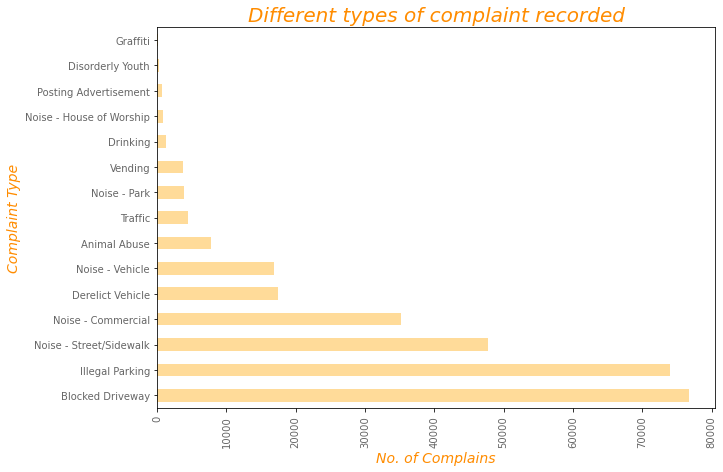

In [21]:
plt.figure(figsize=(10,7))
data['Complaint Type'].value_counts().plot.barh(color='orange',alpha=0.4)
plt.ylabel("Complaint Type",style='italic',fontsize=14,c='darkorange')
plt.xlabel("No. of Complains",style='italic',fontsize=14,c='darkorange')
plt.title("Different types of complaint recorded",style='italic',fontsize=20,c='darkorange')
plt.xticks(rotation='vertical',alpha=0.6)
plt.yticks(alpha=0.6)
plt.show()

In [22]:
complain_type=data['Complaint Type'].value_counts()
print("The max. complain type recieved are :",complain_type.idxmax(),"",complain_type.max(),"\n""Least are :",complain_type.idxmin(),"",complain_type.min())

The max. complain type recieved are : Blocked Driveway  76676 
Least are : Graffiti  113


* *Highest number of complains are of the type 'Blocked Driveway's*

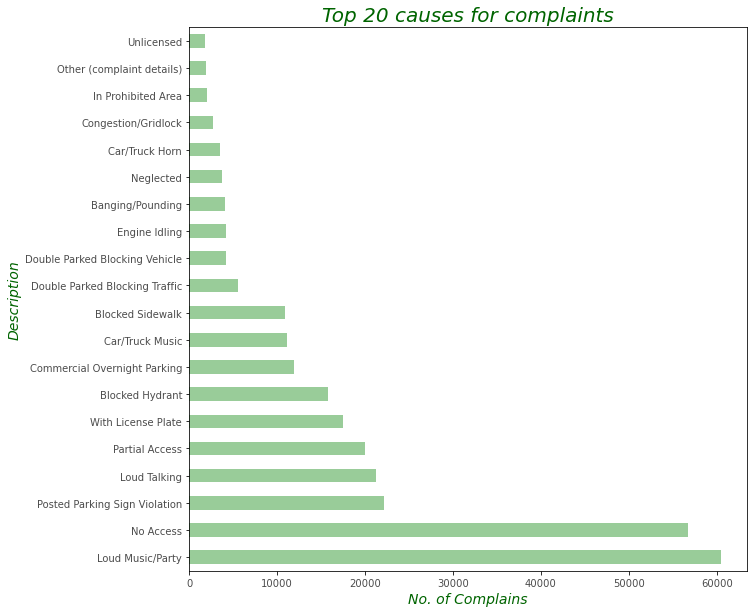

In [23]:
plt.figure(figsize=(10,10))
data['Descriptor'].value_counts().head(20).plot.barh(color='green',alpha=0.4)
plt.ylabel("Description",style='italic',fontsize=14,c='darkgreen')
plt.xlabel("No. of Complains",style='italic',fontsize=14,c='darkgreen')
plt.title("Top 20 causes for complaints",style='italic',fontsize=20,c='darkgreen')
plt.xticks(alpha=0.7)
plt.yticks(alpha=0.7)
plt.show()

In [24]:
desc=data['Descriptor'].value_counts()
print("Most No. of causes for complaints are: ",desc.idxmax(),"",desc.max(),)
print("Least No. of causes for complaints are: ",desc.idxmin(),"",desc.min(),)

Most No. of causes for complaints are:  Loud Music/Party  60444
Least No. of causes for complaints are:  Police Report Not Requested  23


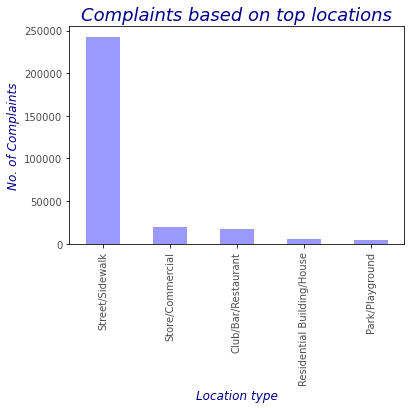

In [25]:
plt.figure(figsize=(6,4))
data['Location Type'].value_counts().head(5).plot.bar(color='blue',alpha=0.4)
plt.xlabel("Location type",style='italic',fontsize=12,c='darkblue')
plt.ylabel("No. of Complaints",style='italic',fontsize=12,c='darkblue')
plt.title("Complaints based on top locations",style='italic',fontsize=18,c='darkblue')
plt.xticks(alpha=0.7)
plt.yticks(alpha=0.7)
plt.show()

In [26]:
loc=data['Location Type'].value_counts().head(5)
print("Highest number of complaints are from:",loc.idxmax(),"",loc.max())

Highest number of complaints are from: Street/Sidewalk  242765


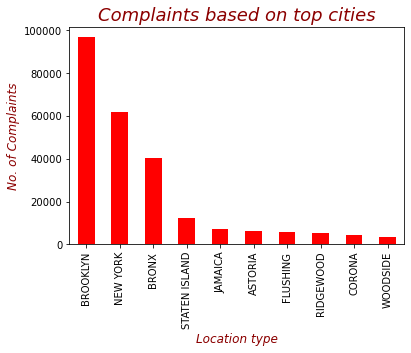

In [27]:
data['City'].value_counts().head(10).plot.bar(color='red')
plt.xlabel("Location type",style='italic',fontsize=12,c='darkred')
plt.ylabel("No. of Complaints",style='italic',fontsize=12,c='darkred')
plt.title("Complaints based on top cities",style='italic',fontsize=18,c='darkred')
plt.show()

In [28]:
city=data['City'].value_counts().head(10)
print("Highest number of complaints are recorded from",city.idxmax(),city.max())

Highest number of complaints are recorded from BROOKLYN 96858


In [29]:
data.groupby(['Borough','Complaint Type']).size().unstack()

Complaint Type,Animal Abuse,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Illegal Parking,Noise - Commercial,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Posting Advertisement,Traffic,Vending
Borough,,,,,,,,,,,,,,,
BRONX,1412,12740,1948,63,187,9,7829,2431,79,522,8864,3385,16,355,377
BROOKLYN,2390,28119,5164,72,257,43,27386,11451,338,1537,13315,5145,45,1082,514
MANHATTAN,1511,2055,530,68,294,22,11981,14528,189,1167,20362,5374,41,1531,2380
QUEENS,1874,31621,8102,59,357,37,21944,6057,297,634,4391,2608,30,1302,477
STATEN ISLAND,557,2141,1762,23,175,2,4881,677,17,67,815,356,515,196,25


<AxesSubplot:xlabel='Borough', ylabel='Complaint Type'>

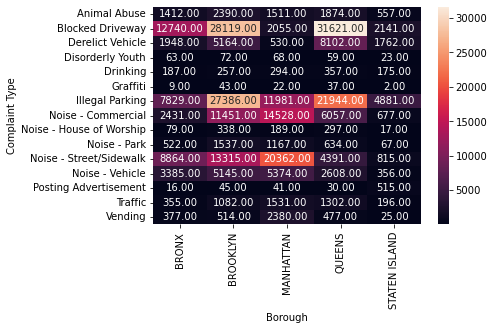

In [30]:
plt.figure()
sns.heatmap(data.groupby(['Complaint Type','Borough']).size().unstack(),annot=True,fmt='0.2f')

* **Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.**

In [31]:
new_data=data.groupby(['City','Complaint Type'])['Request_Closing_Time'].agg('mean').unstack().reset_index()
new_data.head()

Complaint Type,City,Animal Abuse,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Illegal Parking,Noise - Commercial,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Posting Advertisement,Traffic,Vending
0,ARVERNE,0 days 02:09:13.052631578,0 days 02:31:33.485714285,0 days 02:58:05.592592592,0 days 03:35:28.500000,0 days 00:14:19,0 days 01:32:00,0 days 02:18:58.913793103,0 days 02:17:14,0 days 01:33:43.909090909,0 days 01:17:00,0 days 01:59:32.620689655,0 days 01:51:35.571428571,NaT,NaT,0 days 00:29:00
1,ASTORIA,0 days 05:00:00.608000,0 days 04:48:58.024064171,0 days 09:41:21.299145299,0 days 02:54:09.333333333,0 days 04:43:20.714285714,0 days 14:05:42.250000,0 days 04:50:00.825352112,0 days 03:07:41.369734789,0 days 02:01:20,0 days 02:59:42.393442622,0 days 03:27:16.763636363,0 days 03:30:33.034313725,0 days 05:52:12,0 days 05:24:36.659574468,0 days 04:56:07.500000
2,Astoria,NaT,0 days 04:54:52.663793103,0 days 06:14:10.166666666,NaT,NaT,NaT,0 days 04:42:40.643192488,0 days 03:32:30.804597701,NaT,NaT,0 days 03:42:47.631578947,NaT,NaT,NaT,NaT
3,BAYSIDE,0 days 03:16:28.243243243,0 days 02:34:00.944148936,0 days 03:21:35.207070707,0 days 02:58:23,0 days 01:54:00,0 days 04:33:05.666666666,0 days 02:33:55.103718199,0 days 02:14:01.200000,0 days 03:32:05.500000,0 days 03:58:40,0 days 01:31:51.600000,0 days 01:42:30.312500,NaT,0 days 01:31:37,0 days 01:52:40.500000
4,BELLEROSE,0 days 12:43:28.857142857,0 days 10:05:57.884210526,0 days 17:10:05.314606741,0 days 01:51:00,0 days 03:55:05,NaT,0 days 08:16:05.419047619,0 days 06:44:26.783783783,0 days 02:11:49,0 days 01:24:51,0 days 09:04:05.615384615,0 days 02:34:59.400000,0 days 02:15:36,0 days 05:45:31.857142857,NaT


In [32]:
new_data['Animal Abuse']=pd.to_timedelta(new_data['Animal Abuse']).dt.total_seconds()/60
new_data['Blocked Driveway']=pd.to_timedelta(new_data['Blocked Driveway']).dt.total_seconds()/60
new_data['Derelict Vehicle']=pd.to_timedelta(new_data['Derelict Vehicle']).dt.total_seconds()/60
new_data['Disorderly Youth']=pd.to_timedelta(new_data['Disorderly Youth']).dt.total_seconds()/60
new_data['Drinking']=pd.to_timedelta(new_data['Drinking']).dt.total_seconds()/60
new_data['Graffiti']=pd.to_timedelta(new_data['Graffiti']).dt.total_seconds()/60
new_data['Illegal Parking']=pd.to_timedelta(new_data['Illegal Parking']).dt.total_seconds()/60
new_data['Noise - Commercial']=pd.to_timedelta(new_data['Noise - Commercial']).dt.total_seconds()/60
new_data['Noise - House of Worship']=pd.to_timedelta(new_data['Noise - House of Worship']).dt.total_seconds()/60
new_data['Noise - Park']=pd.to_timedelta(new_data['Noise - Park']).dt.total_seconds()/60
new_data['Noise - Street/Sidewalk']=pd.to_timedelta(new_data['Noise - Street/Sidewalk']).dt.total_seconds()/60
new_data['Noise - Vehicle']=pd.to_timedelta(new_data['Noise - Vehicle']).dt.total_seconds()/60
new_data['Posting Advertisement']=pd.to_timedelta(new_data['Posting Advertisement']).dt.total_seconds()/60
new_data['Traffic']=pd.to_timedelta(new_data['Traffic']).dt.total_seconds()/60
new_data['Vending']=pd.to_timedelta(new_data['Vending']).dt.total_seconds()/60

In [33]:
new_data.dtypes

Complaint Type
City                         object
Animal Abuse                float64
Blocked Driveway            float64
Derelict Vehicle            float64
Disorderly Youth            float64
Drinking                    float64
Graffiti                    float64
Illegal Parking             float64
Noise - Commercial          float64
Noise - House of Worship    float64
Noise - Park                float64
Noise - Street/Sidewalk     float64
Noise - Vehicle             float64
Posting Advertisement       float64
Traffic                     float64
Vending                     float64
dtype: object

In [34]:
new_data.isnull().sum()

Complaint Type
City                         0
Animal Abuse                 7
Blocked Driveway             2
Derelict Vehicle             2
Disorderly Youth            21
Drinking                    11
Graffiti                    31
Illegal Parking              1
Noise - Commercial           5
Noise - House of Worship    20
Noise - Park                12
Noise - Street/Sidewalk      3
Noise - Vehicle              6
Posting Advertisement       31
Traffic                     10
Vending                     15
dtype: int64

Treating null values, replacing NaN with 0 since no time is present there

In [35]:
new_data.fillna(0,inplace=True)

In [36]:
new_data.head()

Complaint Type,City,Animal Abuse,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Illegal Parking,Noise - Commercial,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Posting Advertisement,Traffic,Vending
0,ARVERNE,129.217544,151.558095,178.093210,215.475000,14.316667,92.000000,138.981897,137.233333,93.731818,77.000000,119.543678,111.592857,0.0,0.000000,29.000
1,ASTORIA,300.010133,288.967068,581.354986,174.155556,283.345238,845.704167,290.013756,187.689496,121.333333,179.706557,207.279394,210.550572,352.2,324.610993,296.125
2,Astoria,0.000000,294.877730,374.169444,0.000000,0.000000,0.000000,282.677387,212.513410,0.000000,0.000000,222.793860,0.000000,0.0,0.000000,0.000
3,BAYSIDE,196.470721,154.015736,201.586785,178.383333,114.000000,273.094444,153.918395,134.020000,212.091667,238.666667,91.860000,102.505208,0.0,91.616667,112.675
4,BELLEROSE,763.480952,605.964737,1030.088577,111.000000,235.083333,0.000000,496.090317,404.446396,131.816667,84.850000,544.093590,154.990000,135.6,345.530952,0.000


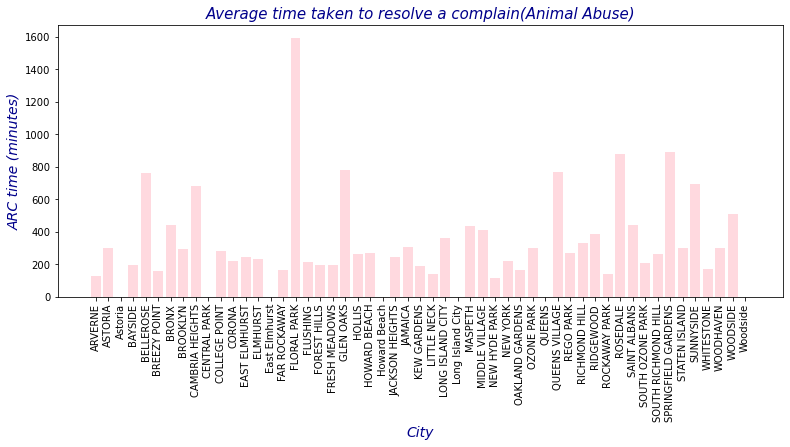

In [37]:
plt.figure(figsize=(13,5))
plt.bar(new_data['City'],new_data['Animal Abuse'],color='pink',alpha=0.6)
plt.xlabel("City",fontsize=14,c='darkblue',style='italic')
plt.title("Average time taken to resolve a complain(Animal Abuse)",c='darkblue',style='italic',fontsize=15)
plt.ylabel("ARC time (minutes)",fontsize=14,c='darkblue',style='italic')
plt.xticks(rotation='vertical')
plt.show()